# Homework #2
*Quantitative Trading Strategies* <br>
*04.15.2021*

### Last number of id is 1, so the ETF pair I analyze is RYE and XOP
- RYE: Invesco S&P 500 Equal Weight Energy ETF
- XOP: SPDR S&P Oil & Gas Exploration & Production ETF

## Imports

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy as sp
import quandl
import functools
import seaborn as sns
import statsmodels.api as sm
import plotnine as p9
from statsmodels.tsa.stattools import adfuller
import scipy.stats as stats
import math
import warnings
warnings.filterwarnings("ignore")

## Data

**Define a fetch quandl function (with help from the Quandl beginner example) to grab our data, make sure it only runs once.**

In [2]:
startdate = '2018-12-02'
enddate = '2020-12-31'

try:
    # Do not recreate if it already exists
    fetch_quandl
    print("fetch_quandl already defined")
except NameError:
    @functools.lru_cache(maxsize=16)
    def fetch_quandl(my_securities):
        print("Fetching from Quandl")
        qdata = quandl.get(list(my_securities), returns="pandas",
                          api_key=os.getenv("QUANDL_API_KEY"),
                          start_date=startdate, end_date=enddate)
        return qdata
    print("fetch_quandl has now been newly defined")

fetch_quandl has now been newly defined


**Grab split- and dividend-adjusted closing prices for RYE and XOP:**

In [3]:
RYE_ = 'EOD/RYE'
XOP_ = 'EOD/XOP'

df = fetch_quandl((RYE_, XOP_))

Fetching from Quandl


In [4]:
adj_df = df[['EOD/RYE - Adj_Close', 'EOD/RYE - Adj_Volume', 'EOD/XOP - Adj_Close', 'EOD/XOP - Adj_Volume']]
adj_df

,EOD/RYE - Adj_Close,EOD/RYE - Adj_Volume,EOD/XOP - Adj_Close,EOD/XOP - Adj_Volume
Date,,,,
2018-12-03,48.325578,52863.0,128.593521,4751525.00
2018-12-04,46.848214,48633.0,124.227340,3973563.25
2018-12-06,45.714640,91944.0,120.278793,9024761.50
2018-12-07,45.482350,66265.0,119.747258,8226956.75
2018-12-10,44.450983,45322.0,115.874646,6194714.75
...,...,...,...,...
2020-12-24,30.895899,16649.0,58.742303,3547530.00
2020-12-28,30.656349,36858.0,57.667020,5385490.00
2020-12-29,30.448420,32508.0,57.139335,5056715.00


I also grabbed adjusted volume. 

**Find the 15-day rolling median Dollar Volume for each ETF, denote the less liquid ETF's median $N_{t}$:**

In [5]:
adj_df['Dollar Volume - RYE'] = adj_df['EOD/RYE - Adj_Close'] * adj_df['EOD/RYE - Adj_Volume']
adj_df['Dollar Volume - XOP'] = adj_df['EOD/XOP - Adj_Close'] * adj_df['EOD/XOP - Adj_Volume']
adj_df['RYE Volume 15-day Median'] = adj_df['Dollar Volume - RYE'].shift().rolling(15).median()
adj_df['XOP Volume 15-day Median'] = adj_df['Dollar Volume - XOP'].shift().rolling(15).median()
adj_df['$N_{t}$'] = adj_df[['RYE Volume 15-day Median','XOP Volume 15-day Median']].min(axis=1)

adj_df

,EOD/RYE - Adj_Close,EOD/RYE - Adj_Volume,EOD/XOP - Adj_Close,EOD/XOP - Adj_Volume,Dollar Volume - RYE,Dollar Volume - XOP,RYE Volume 15-day Median,XOP Volume 15-day Median,$N_{t}$
Date,,,,,,,,,
2018-12-03,48.325578,52863.0,128.593521,4751525.00,2.554635e+06,6.110153e+08,NaN,NaN,NaN
2018-12-04,46.848214,48633.0,124.227340,3973563.25,2.278369e+06,4.936252e+08,NaN,NaN,NaN
2018-12-06,45.714640,91944.0,120.278793,9024761.50,4.203187e+06,1.085487e+09,NaN,NaN,NaN
2018-12-07,45.482350,66265.0,119.747258,8226956.75,3.013888e+06,9.851555e+08,NaN,NaN,NaN
2018-12-10,44.450983,45322.0,115.874646,6194714.75,2.014607e+06,7.178104e+08,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2020-12-24,30.895899,16649.0,58.742303,3547530.00,5.143858e+05,2.083901e+08,1.313601e+06,6.092120e+08,1.313601e+06
2020-12-28,30.656349,36858.0,57.667020,5385490.00,1.129932e+06,3.105652e+08,1.264608e+06,6.092120e+08,1.264608e+06
2020-12-29,30.448420,32508.0,57.139335,5056715.00,9.898172e+05,2.889373e+08,1.129932e+06,5.004358e+08,1.129932e+06


**Fama French Factors:**

In [6]:
ff_df = pd.read_csv('F-F_Research_Data_5_Factors_2x3_daily.CSV', skiprows = 3).dropna()
ff_df.rename(columns={ff_df.columns[0]:'Date'}, inplace=True)

ff_df['Date'] = pd.to_datetime(ff_df['Date'], format='%Y%m%d')

ff_df.set_index('Date', inplace = True)
ff_df = ff_df.loc[startdate:enddate]

ff_df

,Mkt-RF,SMB,HML,RMW,CMA,RF
Date,,,,,,
2018-12-03,1.13,-0.12,-0.79,-0.28,-0.58,0.01
2018-12-04,-3.45,-1.03,-0.18,-0.14,0.91,0.01
2018-12-06,-0.16,-0.06,-1.04,0.15,-0.30,0.01
2018-12-07,-2.36,0.26,1.33,-0.52,0.61,0.01
2018-12-10,0.10,-0.39,-1.65,0.32,-0.30,0.01
...,...,...,...,...,...,...
2020-12-24,0.21,-0.43,-0.17,0.24,-0.05,0.00
2020-12-28,0.46,-0.65,0.32,1.46,0.50,0.00
2020-12-29,-0.40,-1.42,0.24,0.75,-0.28,0.00


## Exercise

Let's set some starting parameters that seem reasonable:

In [7]:
M = 10
g = 0.03
j = 0.0075
s = 0.03
K = (adj_df['$N_{t}$']).max() * 2

Let's make a trading dataframe that has the ETF returns and the spread:

In [8]:
trading = adj_df.copy()

trading['RYE Return'] = None
trading['XOP Return'] = None
for i in range(M, len(trading)):
    trading['RYE Return'].iloc[i] = np.log(trading['EOD/RYE - Adj_Close'].iloc[i] / trading['EOD/RYE - Adj_Close'].iloc[i-M])
    trading['XOP Return'].iloc[i] = np.log(trading['EOD/XOP - Adj_Close'].iloc[i] / trading['EOD/XOP - Adj_Close'].iloc[i-M])
# trading['RYE Return'] = trading['EOD/RYE - Adj_Close'].pct_change(periods = M)
# trading['XOP Return'] = trading['EOD/XOP - Adj_Close'].pct_change(periods = M)
trading['Return Spread'] = trading['RYE Return'] - trading['XOP Return']
trading['Cumulative PL'] = 0
trading['Current Position PL'] = 0
trading['RYE position'] = 0
trading['XOP position'] = 0
trading['Cash'] = 0

trading = trading.loc['2019':]


trading

,EOD/RYE - Adj_Close,EOD/RYE - Adj_Volume,EOD/XOP - Adj_Close,EOD/XOP - Adj_Volume,Dollar Volume - RYE,Dollar Volume - XOP,RYE Volume 15-day Median,XOP Volume 15-day Median,$N_{t}$,RYE Return,XOP Return,Return Spread,Cumulative PL,Current Position PL,RYE position,XOP position,Cash
Date,,,,,,,,,,,,,,,,,
2019-01-02,41.195414,82645.0,103.881130,6317028.50,3.404595e+06,6.562201e+08,4.587481e+06,7.659842e+08,4.587481e+06,-0.030734,-0.03091,0.000177,0,0,0,0,0
2019-01-03,40.953044,49981.0,103.157883,4579129.00,2.046874e+06,4.723733e+08,4.587481e+06,7.659842e+08,4.587481e+06,-0.014072,-0.008774,-0.005298,0,0,0,0,0
2019-01-04,42.671404,71467.0,108.981925,6622528.00,3.049597e+06,7.217359e+08,4.587481e+06,7.202095e+08,4.587481e+06,0.038958,0.059738,-0.02078,0,0,0,0,0
2019-01-07,43.549972,205871.0,112.712358,6920527.25,8.965676e+06,7.800289e+08,4.091746e+06,7.202095e+08,4.091746e+06,0.088979,0.131847,-0.042868,0,0,0,0,0
2019-01-08,44.130389,166426.0,113.740130,7564765.25,7.344444e+06,8.604174e+08,4.587481e+06,7.202095e+08,4.587481e+06,0.114655,0.164411,-0.049755,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,30.895899,16649.0,58.742303,3547530.00,5.143858e+05,2.083901e+08,1.313601e+06,6.092120e+08,1.313601e+06,-0.082044,-0.071502,-0.010542,0,0,0,0,0
2020-12-28,30.656349,36858.0,57.667020,5385490.00,1.129932e+06,3.105652e+08,1.264608e+06,6.092120e+08,1.264608e+06,-0.072606,-0.070639,-0.001967,0,0,0,0,0
2020-12-29,30.448420,32508.0,57.139335,5056715.00,9.898172e+05,2.889373e+08,1.129932e+06,5.004358e+08,1.129932e+06,-0.0397,-0.038496,-0.001204,0,0,0,0,0


### Data Exploration

In [9]:
ETF_returns = trading[['RYE Return', 'XOP Return']]
ETF_returns.astype(float).corr()

,RYE Return,XOP Return
RYE Return,1.000000,0.955181
XOP Return,0.955181,1.000000


These ETFs are extremely correlated, which is certainly not surprising given they are both S&P Energy ETFs. This correlation points to the potential opportunity of a mean reversion strategy where when the spread in recent returns widens we bet that it will go back to close to zero. 

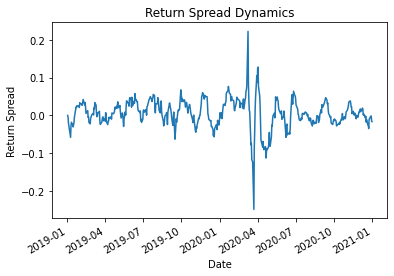

In [10]:
trading['Return Spread'].plot()
plt.title('Return Spread Dynamics')
plt.xlabel('Date')
plt.ylabel('Return Spread')
plt.show()

In [11]:
ADF_rspread = pd.DataFrame(data=None,columns=['ADF-stat','p-value'],index=['Return Spread'])

res_ADF_rspread = adfuller(trading['Return Spread'].dropna().values)
ADF_rspread['ADF-stat'].loc['Return Spread'] = res_ADF_rspread[0]
ADF_rspread['p-value'].loc['Return Spread'] = res_ADF_rspread[1]

ADF_rspread

,ADF-stat,p-value
Return Spread,-5.717486,0.000001


We reject the null hypothesis that a unit root exists. The return spread appears to be stationary, so it looks like a good spread trading opportunity. 

### Trading Strategy Execution:

Let's run the strategy for those original parameters we set. Soon we can turn this into a function that will take the parameters as inputs and then run the strategy.

In [12]:
for i in range(0, len(trading)):
    if i == 0:     ### FIRST DAY, INITIALIZE CASH AND MAYBE TRADE
        trading['Cash'].iloc[i] = K
        if abs(trading['Return Spread'].iloc[i]) >= g:
            trade_size = trading['$N_{t}$'].iloc[0]/100
            RYE_shares = round(trade_size / trading['EOD/RYE - Adj_Close'].iloc[i], 0)
            XOP_shares = round(trade_size / trading['EOD/XOP - Adj_Close'].iloc[i], 0)
            if trading['Return Spread'].iloc[i] > 0:
                trading['RYE position'].iloc[i] = -RYE_shares
                trading['XOP position'].iloc[i] = XOP_shares
                trading['Cash'].iloc[i] -= trading['EOD/RYE - Adj_Close'].iloc[i] * -RYE_shares
                trading['Cash'].iloc[i] -= trading['EOD/XOP - Adj_Close'].iloc[i] * XOP_shares
                pos_spread = True
            else:
                trading['RYE position'].iloc[i] = RYE_shares
                trading['XOP position'].iloc[i] = -XOP_shares
                trading['Cash'].iloc[i] -= trading['EOD/RYE - Adj_Close'].iloc[i] * RYE_shares
                trading['Cash'].iloc[i] -= trading['EOD/XOP - Adj_Close'].iloc[i] * -XOP_shares
                pos_spread = False
            gross_traded_cash = trading['EOD/RYE - Adj_Close'].iloc[i] * RYE_shares + trading['EOD/XOP - Adj_Close'].iloc[i] * XOP_shares
            
    elif i == len(trading) - 1:   ### EXIT POSITION AT LAST DATE
        trading['Cash'].iloc[i] = trading['Cash'].iloc[i-1]
        if trading['RYE position'].iloc[i-1] != 0 or trading['XOP position'].iloc[i-1] != 0:
            RYE_shares = trading['RYE position'].iloc[i-1]
            XOP_shares = trading['XOP position'].iloc[i-1]
            gain = ((RYE_shares * (trading['EOD/RYE - Adj_Close'].iloc[i] 
                                      - trading['EOD/RYE - Adj_Close'].iloc[i-1])) 
                    + (XOP_shares *(trading['EOD/XOP - Adj_Close'].iloc[i]
                                        - trading['EOD/XOP - Adj_Close'].iloc[i-1])))
            trading['Cash'].iloc[i] += trading['EOD/RYE - Adj_Close'].iloc[i] * RYE_shares
            trading['Cash'].iloc[i] += trading['EOD/XOP - Adj_Close'].iloc[i] * XOP_shares
            trading['Cumulative PL'].iloc[i] = trading['Cumulative PL'].iloc[i-1] + gain 
        else:
            trading['Cumulative PL'].iloc[i] = trading['Cumulative PL'].iloc[i-1]
    
    elif trading.iloc[i].name.month < trading.iloc[i+1].name.month and trading.iloc[i].name.day > 20:  ### IF LAST DAY OF THE MONTH EXIT POSITION
        trading['Cash'].iloc[i] = trading['Cash'].iloc[i-1]
        if trading['RYE position'].iloc[i-1] != 0 or trading['XOP position'].iloc[i-1] != 0:
            RYE_shares = trading['RYE position'].iloc[i-1]
            XOP_shares = trading['XOP position'].iloc[i-1]
            gain = ((RYE_shares * (trading['EOD/RYE - Adj_Close'].iloc[i] 
                                      - trading['EOD/RYE - Adj_Close'].iloc[i-1])) 
                    + (XOP_shares *(trading['EOD/XOP - Adj_Close'].iloc[i]
                                        - trading['EOD/XOP - Adj_Close'].iloc[i-1])))
            trading['Cash'].iloc[i] += trading['EOD/RYE - Adj_Close'].iloc[i] * RYE_shares
            trading['Cash'].iloc[i] += trading['EOD/XOP - Adj_Close'].iloc[i] * XOP_shares
            trading['Cumulative PL'].iloc[i] = trading['Cumulative PL'].iloc[i-1] + gain 
        else:
            trading['Cumulative PL'].iloc[i] = trading['Cumulative PL'].iloc[i-1]
            
    else:
    
        if trading['RYE position'].iloc[i-1] != 0 or trading['XOP position'].iloc[i-1] != 0:  ### DO WE ALREADY HAVE A POSITION
            trading['Cash'].iloc[i] = trading['Cash'].iloc[i-1]
            RYE_shares = trading['RYE position'].iloc[i-1]
            XOP_shares = trading['XOP position'].iloc[i-1]
            gain = ((RYE_shares * (trading['EOD/RYE - Adj_Close'].iloc[i] 
                                      - trading['EOD/RYE - Adj_Close'].iloc[i-1])) 
                    + (XOP_shares *(trading['EOD/XOP - Adj_Close'].iloc[i]
                                        - trading['EOD/XOP - Adj_Close'].iloc[i-1])))
            
            if pos_spread == True and trading['Return Spread'].iloc[i] <= j:    
                trading['Cash'].iloc[i] += trading['EOD/RYE - Adj_Close'].iloc[i] * RYE_shares
                trading['Cash'].iloc[i] += trading['EOD/XOP - Adj_Close'].iloc[i] * XOP_shares
                trading['Cumulative PL'].iloc[i] = trading['Cumulative PL'].iloc[i-1] + gain 
                if trading['Return Spread'].iloc[i] <= -g:
                    trade_size = trading['$N_{t}$'].iloc[0]/100
                    RYE_shares = round(trade_size / trading['EOD/RYE - Adj_Close'].iloc[i], 0)
                    XOP_shares = round(trade_size / trading['EOD/XOP - Adj_Close'].iloc[i], 0)
                    trading['RYE position'].iloc[i] = RYE_shares
                    trading['XOP position'].iloc[i] = -XOP_shares
                    trading['Cash'].iloc[i] -= trading['EOD/RYE - Adj_Close'].iloc[i] * RYE_shares
                    trading['Cash'].iloc[i] -= trading['EOD/XOP - Adj_Close'].iloc[i] * -XOP_shares
                    pos_spread = False
                    gross_traded_cash = (trading['EOD/RYE - Adj_Close'].iloc[i] * RYE_shares 
                                     + trading['EOD/XOP - Adj_Close'].iloc[i] * XOP_shares)
                    
            elif pos_spread == False and trading['Return Spread'].iloc[i] >= -j:
                trading['Cash'].iloc[i] += trading['EOD/RYE - Adj_Close'].iloc[i] * RYE_shares
                trading['Cash'].iloc[i] += trading['EOD/XOP - Adj_Close'].iloc[i] * XOP_shares
                trading['Cumulative PL'].iloc[i] = trading['Cumulative PL'].iloc[i-1] + gain 
                if trading['Return Spread'].iloc[i] >= g:
                    trade_size = trading['$N_{t}$'].iloc[0]/100
                    RYE_shares = round(trade_size / trading['EOD/RYE - Adj_Close'].iloc[i], 0)
                    XOP_shares = round(trade_size / trading['EOD/XOP - Adj_Close'].iloc[i], 0)
                    trading['RYE position'].iloc[i] = -RYE_shares
                    trading['XOP position'].iloc[i] = XOP_shares
                    trading['Cash'].iloc[i] -= trading['EOD/RYE - Adj_Close'].iloc[i] * -RYE_shares
                    trading['Cash'].iloc[i] -= trading['EOD/XOP - Adj_Close'].iloc[i] * XOP_shares
                    pos_spread = True
                    gross_traded_cash = (trading['EOD/RYE - Adj_Close'].iloc[i] * RYE_shares 
                                     + trading['EOD/XOP - Adj_Close'].iloc[i] * XOP_shares)
                    
            elif abs(trading['Current Position PL'].iloc[i-1] + gain) / gross_traded_cash > s:
                trading['Cash'].iloc[i] += trading['EOD/RYE - Adj_Close'].iloc[i] * RYE_shares
                trading['Cash'].iloc[i] += trading['EOD/XOP - Adj_Close'].iloc[i] * XOP_shares
                trading['Cumulative PL'].iloc[i] = trading['Cumulative PL'].iloc[i-1] + gain 
                
            else:
                trading['Current Position PL'].iloc[i] = trading['Current Position PL'].iloc[i-1] + gain
                trading['Cumulative PL'].iloc[i] = trading['Cumulative PL'].iloc[i-1] + gain
                trading['RYE position'].iloc[i] = RYE_shares
                trading['XOP position'].iloc[i] = XOP_shares
                
                
        else:   ### WE DO NOT HAVE A POSITION, SHOULD WE TRADE?
            trading['Cash'].iloc[i] = trading['Cash'].iloc[i-1]
            trading['Cumulative PL'].iloc[i] = trading['Cumulative PL'].iloc[i-1] 
            if abs(trading['Return Spread'].iloc[i]) >= g:
                trade_size = trading['$N_{t}$'].iloc[0]/100
                RYE_shares = round(trade_size / trading['EOD/RYE - Adj_Close'].iloc[i], 0)
                XOP_shares = round(trade_size / trading['EOD/XOP - Adj_Close'].iloc[i], 0)
                if trading['Return Spread'].iloc[i] > 0:
                    trading['RYE position'].iloc[i] = -RYE_shares
                    trading['XOP position'].iloc[i] = XOP_shares
                    trading['Cash'].iloc[i] -= trading['EOD/RYE - Adj_Close'].iloc[i] * -RYE_shares
                    trading['Cash'].iloc[i] -= trading['EOD/XOP - Adj_Close'].iloc[i] * XOP_shares
                    pos_spread = True
                else:
                    trading['RYE position'].iloc[i] = RYE_shares
                    trading['XOP position'].iloc[i] = -XOP_shares
                    trading['Cash'].iloc[i] -= trading['EOD/RYE - Adj_Close'].iloc[i] * RYE_shares
                    trading['Cash'].iloc[i] -= trading['EOD/XOP - Adj_Close'].iloc[i] * -XOP_shares
                    pos_spread = False
                gross_traded_cash = (trading['EOD/RYE - Adj_Close'].iloc[i] * RYE_shares 
                                     + trading['EOD/XOP - Adj_Close'].iloc[i] * XOP_shares)
            

In [13]:
pd.set_option('display.max_rows', None)
trading

,EOD/RYE - Adj_Close,EOD/RYE - Adj_Volume,EOD/XOP - Adj_Close,EOD/XOP - Adj_Volume,Dollar Volume - RYE,Dollar Volume - XOP,RYE Volume 15-day Median,XOP Volume 15-day Median,$N_{t}$,RYE Return,XOP Return,Return Spread,Cumulative PL,Current Position PL,RYE position,XOP position,Cash
Date,,,,,,,,,,,,,,,,,
2019-01-02,41.195414,82645.0,103.881130,6317028.50,3.404595e+06,6.562201e+08,4.587481e+06,7.659842e+08,4.587481e+06,-0.030734,-0.03091,0.000177,0.000000,0.000000,0.0,0.0,1.031923e+07
2019-01-03,40.953044,49981.0,103.157883,4579129.00,2.046874e+06,4.723733e+08,4.587481e+06,7.659842e+08,4.587481e+06,-0.014072,-0.008774,-0.005298,0.000000,0.000000,0.0,0.0,1.031923e+07
2019-01-04,42.671404,71467.0,108.981925,6622528.00,3.049597e+06,7.217359e+08,4.587481e+06,7.202095e+08,4.587481e+06,0.038958,0.059738,-0.02078,0.000000,0.000000,0.0,0.0,1.031923e+07
2019-01-07,43.549972,205871.0,112.712358,6920527.25,8.965676e+06,7.800289e+08,4.091746e+06,7.202095e+08,4.091746e+06,0.088979,0.131847,-0.042868,0.000000,0.000000,1053.0,-407.0,1.031924e+07
2019-01-08,44.130389,166426.0,113.740130,7564765.25,7.344444e+06,8.604174e+08,4.587481e+06,7.202095e+08,4.587481e+06,0.114655,0.164411,-0.049755,192.875931,192.875931,1053.0,-407.0,1.031924e+07
2019-01-09,44.998212,163552.0,116.290528,6565972.75,7.359548e+06,7.635604e+08,5.159614e+06,7.202095e+08,5.159614e+06,0.178426,0.236323,-0.057898,68.681269,68.681269,1053.0,-407.0,1.031924e+07
2019-01-10,45.316825,71906.0,117.013775,4762084.25,3.258552e+06,5.572295e+08,5.159614e+06,7.202095e+08,5.159614e+06,0.116439,0.142776,-0.026337,109.818910,109.818910,1053.0,-407.0,1.031924e+07
2019-01-11,45.091647,63406.0,115.719544,5148220.25,2.859081e+06,5.957497e+08,4.587481e+06,7.109248e+08,4.587481e+06,0.110068,0.127908,-0.01784,399.458868,399.458868,1053.0,-407.0,1.031924e+07
2019-01-14,45.129021,51384.0,115.795675,5202702.75,2.318910e+06,6.024505e+08,4.587481e+06,6.698404e+08,4.587481e+06,0.11856,0.142873,-0.024314,407.828186,407.828186,1053.0,-407.0,1.031924e+07


**Conceptual checks for code:**

In [14]:
print('Starting Cash: ' + str(K))
print('Ending Cash - Cumulative PL: ' + str(trading['Cash'].iloc[-1] - trading['Cumulative PL'].iloc[-1]))

Starting Cash: 10319228.12720645
Ending Cash - Cumulative PL: 10319228.127206443


Ending cash - Cumulative PL = Starting cash which makes sense

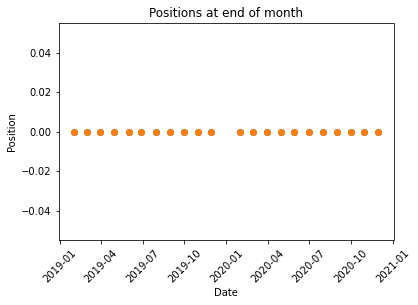

In [15]:
end_of_month = []
RYE_pos_list = []
XOP_pos_list = []
for i in range(0,len(trading)-1):
    if trading.iloc[i].name.month < trading.iloc[i+1].name.month and trading.iloc[i].name.day > 20:
        end_of_month.append(trading.iloc[i].name)
        RYE_pos_list.append(trading['RYE position'].iloc[i])
        XOP_pos_list.append(trading['XOP position'].iloc[i])
        
plt.scatter(end_of_month,RYE_pos_list)
plt.scatter(end_of_month,XOP_pos_list)
plt.ylabel('Position')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title('Positions at end of month')
plt.show()

This is good, we wanted to close out all positions at the end of the month.

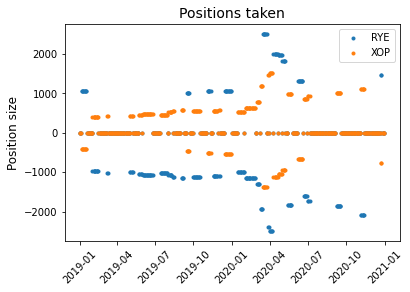

In [16]:
plt.scatter(trading.index, trading['RYE position'], marker = '.',label='RYE')
plt.scatter(trading.index, trading['XOP position'], marker = '.',label='XOP')
plt.ylabel('Position size',size=12)
plt.legend()
plt.xticks(rotation=45)
plt.title('Positions taken',size=14)
plt.show()

Opposing positions seem to match (when we take scaling into account of course) so this makes sense.

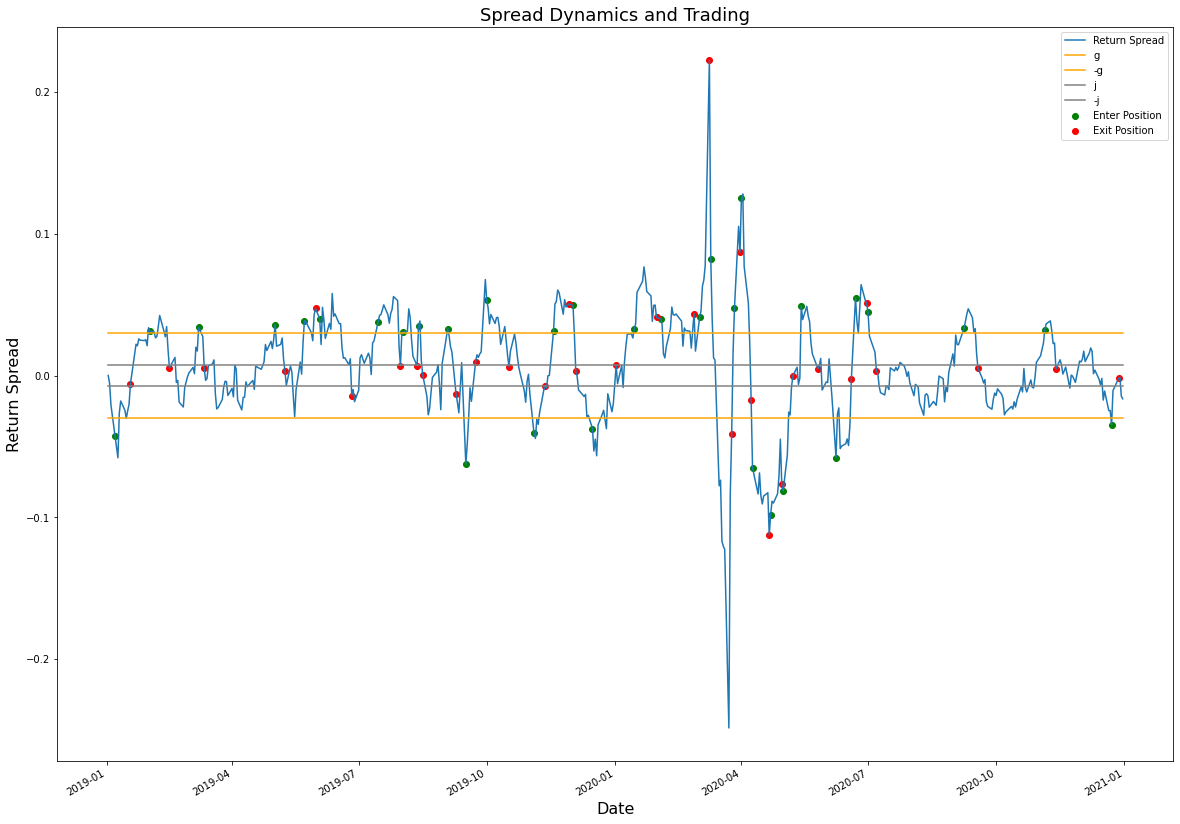

In [17]:
plt.figure(figsize=(20,15))
trading['g'] = g
trading['-g'] = -g
trading['j'] = j
trading['-j'] = -j

Spread_entry = []
Entry_date = []
Spread_exit = []
Exit_date = []
for i in range(1,len(trading)):
    if trading['RYE position'].iloc[i-1] == 0 and trading['XOP position'].iloc[i-1] == 0:
        if trading['RYE position'].iloc[i] != 0 or trading['XOP position'].iloc[i] != 0:
            Spread_entry.append(trading['Return Spread'].iloc[i]) 
            Entry_date.append(trading.iloc[i].name)
    elif trading['RYE position'].iloc[i-1] != 0 and trading['XOP position'].iloc[i-1] != 0:
        if trading['RYE position'].iloc[i] == 0 and trading['XOP position'].iloc[i] == 0:
            Spread_exit.append(trading['Return Spread'].iloc[i]) 
            Exit_date.append(trading.iloc[i].name)

trading['Return Spread'].plot()
plt.scatter(Entry_date,Spread_entry,marker='o',color='green',label = 'Enter Position')
plt.scatter(Exit_date,Spread_exit,marker='o',color='red', label = 'Exit Position')
trading['g'].plot(color='orange')
trading['-g'].plot(color='orange')
trading['j'].plot(color = 'gray')
trading['-j'].plot(color = 'gray')
plt.title('Spread Dynamics and Trading', size = 18)
plt.xlabel('Date', size = 16)
plt.ylabel('Return Spread', size = 16)
plt.legend()
plt.show()

This is what the trading strategy looks like with the parameters **M = 10, g = 0.03, j = 0.0075, s = 0.03**.

## Analysis

### Determining more optimal parameters:

We create a function that returns the trading dataframe when we input parameters, then we create a function that just returns Cumulative PL from running this function inside it and grabbing the final Cumulative PL calculation.

In [18]:
def simulation_df(M, g, j, s):
    trading = adj_df.copy()
    
    trading['RYE Return'] = None
    trading['XOP Return'] = None
    for i in range(M, len(trading)):
        trading['RYE Return'].iloc[i] = np.log(trading['EOD/RYE - Adj_Close'].iloc[i] / trading['EOD/RYE - Adj_Close'].iloc[i-M])
        trading['XOP Return'].iloc[i] = np.log(trading['EOD/XOP - Adj_Close'].iloc[i] / trading['EOD/XOP - Adj_Close'].iloc[i-M])
#     trading['RYE Return'] = trading['EOD/RYE - Adj_Close'].pct_change(periods = M)
#     trading['XOP Return'] = trading['EOD/XOP - Adj_Close'].pct_change(periods = M)
    trading['Return Spread'] = trading['RYE Return'] - trading['XOP Return']
    trading['Cumulative PL'] = 0
    trading['Current Position PL'] = 0
    trading['RYE position'] = 0
    trading['XOP position'] = 0
    trading['Cash'] = 0

    trading = trading.loc['2019':]
    
    for i in range(0, len(trading)):
        if i == 0:     ### FIRST DAY, INITIALIZE CASH AND MAYBE TRADE
            trading['Cash'].iloc[i] = K
            if abs(trading['Return Spread'].iloc[i]) >= g:
                trade_size = trading['$N_{t}$'].iloc[0]/100
                RYE_shares = round(trade_size / trading['EOD/RYE - Adj_Close'].iloc[i], 0)
                XOP_shares = round(trade_size / trading['EOD/XOP - Adj_Close'].iloc[i], 0)
                if trading['Return Spread'].iloc[i] > 0:
                    trading['RYE position'].iloc[i] = -RYE_shares
                    trading['XOP position'].iloc[i] = XOP_shares
                    trading['Cash'].iloc[i] -= trading['EOD/RYE - Adj_Close'].iloc[i] * -RYE_shares
                    trading['Cash'].iloc[i] -= trading['EOD/XOP - Adj_Close'].iloc[i] * XOP_shares
                    pos_spread = True
                else:
                    trading['RYE position'].iloc[i] = RYE_shares
                    trading['XOP position'].iloc[i] = -XOP_shares
                    trading['Cash'].iloc[i] -= trading['EOD/RYE - Adj_Close'].iloc[i] * RYE_shares
                    trading['Cash'].iloc[i] -= trading['EOD/XOP - Adj_Close'].iloc[i] * -XOP_shares
                    pos_spread = False
                gross_traded_cash = trading['EOD/RYE - Adj_Close'].iloc[i] * RYE_shares + trading['EOD/XOP - Adj_Close'].iloc[i] * XOP_shares

        elif i == len(trading) - 1:   ### EXIT POSITION AT LAST DATE
            trading['Cash'].iloc[i] = trading['Cash'].iloc[i-1]
            if trading['RYE position'].iloc[i-1] != 0 or trading['XOP position'].iloc[i-1] != 0:
                RYE_shares = trading['RYE position'].iloc[i-1]
                XOP_shares = trading['XOP position'].iloc[i-1]
                gain = ((RYE_shares * (trading['EOD/RYE - Adj_Close'].iloc[i] 
                                          - trading['EOD/RYE - Adj_Close'].iloc[i-1])) 
                        + (XOP_shares *(trading['EOD/XOP - Adj_Close'].iloc[i]
                                            - trading['EOD/XOP - Adj_Close'].iloc[i-1])))
                trading['Cash'].iloc[i] += trading['EOD/RYE - Adj_Close'].iloc[i] * RYE_shares
                trading['Cash'].iloc[i] += trading['EOD/XOP - Adj_Close'].iloc[i] * XOP_shares
                trading['Cumulative PL'].iloc[i] = trading['Cumulative PL'].iloc[i-1] + gain 
            else:
                trading['Cumulative PL'].iloc[i] = trading['Cumulative PL'].iloc[i-1]

        elif trading.iloc[i].name.month < trading.iloc[i+1].name.month and trading.iloc[i].name.day > 20:  ### IF LAST DAY OF THE MONTH EXIT POSITION
            trading['Cash'].iloc[i] = trading['Cash'].iloc[i-1]
            if trading['RYE position'].iloc[i-1] != 0 or trading['XOP position'].iloc[i-1] != 0:
                RYE_shares = trading['RYE position'].iloc[i-1]
                XOP_shares = trading['XOP position'].iloc[i-1]
                gain = ((RYE_shares * (trading['EOD/RYE - Adj_Close'].iloc[i] 
                                          - trading['EOD/RYE - Adj_Close'].iloc[i-1])) 
                        + (XOP_shares *(trading['EOD/XOP - Adj_Close'].iloc[i]
                                            - trading['EOD/XOP - Adj_Close'].iloc[i-1])))
                trading['Cash'].iloc[i] += trading['EOD/RYE - Adj_Close'].iloc[i] * RYE_shares
                trading['Cash'].iloc[i] += trading['EOD/XOP - Adj_Close'].iloc[i] * XOP_shares
                trading['Cumulative PL'].iloc[i] = trading['Cumulative PL'].iloc[i-1] + gain 
            else:
                trading['Cumulative PL'].iloc[i] = trading['Cumulative PL'].iloc[i-1]

        else:

            if trading['RYE position'].iloc[i-1] != 0 or trading['XOP position'].iloc[i-1] != 0:  ### DO WE ALREADY HAVE A POSITION
                trading['Cash'].iloc[i] = trading['Cash'].iloc[i-1]
                RYE_shares = trading['RYE position'].iloc[i-1]
                XOP_shares = trading['XOP position'].iloc[i-1]
                gain = ((RYE_shares * (trading['EOD/RYE - Adj_Close'].iloc[i] 
                                          - trading['EOD/RYE - Adj_Close'].iloc[i-1])) 
                        + (XOP_shares *(trading['EOD/XOP - Adj_Close'].iloc[i]
                                            - trading['EOD/XOP - Adj_Close'].iloc[i-1])))

                if pos_spread == True and trading['Return Spread'].iloc[i] <= j:    
                    trading['Cash'].iloc[i] += trading['EOD/RYE - Adj_Close'].iloc[i] * RYE_shares
                    trading['Cash'].iloc[i] += trading['EOD/XOP - Adj_Close'].iloc[i] * XOP_shares
                    trading['Cumulative PL'].iloc[i] = trading['Cumulative PL'].iloc[i-1] + gain 
                    if trading['Return Spread'].iloc[i] <= -g:
                        trade_size = trading['$N_{t}$'].iloc[0]/100
                        RYE_shares = round(trade_size / trading['EOD/RYE - Adj_Close'].iloc[i], 0)
                        XOP_shares = round(trade_size / trading['EOD/XOP - Adj_Close'].iloc[i], 0)
                        trading['RYE position'].iloc[i] = RYE_shares
                        trading['XOP position'].iloc[i] = -XOP_shares
                        trading['Cash'].iloc[i] -= trading['EOD/RYE - Adj_Close'].iloc[i] * RYE_shares
                        trading['Cash'].iloc[i] -= trading['EOD/XOP - Adj_Close'].iloc[i] * -XOP_shares
                        pos_spread = False
                        gross_traded_cash = (trading['EOD/RYE - Adj_Close'].iloc[i] * RYE_shares 
                                         + trading['EOD/XOP - Adj_Close'].iloc[i] * XOP_shares)

                elif pos_spread == False and trading['Return Spread'].iloc[i] >= -j:
                    trading['Cash'].iloc[i] += trading['EOD/RYE - Adj_Close'].iloc[i] * RYE_shares
                    trading['Cash'].iloc[i] += trading['EOD/XOP - Adj_Close'].iloc[i] * XOP_shares
                    trading['Cumulative PL'].iloc[i] = trading['Cumulative PL'].iloc[i-1] + gain 
                    if trading['Return Spread'].iloc[i] >= g:
                        trade_size = trading['$N_{t}$'].iloc[0]/100
                        RYE_shares = round(trade_size / trading['EOD/RYE - Adj_Close'].iloc[i], 0)
                        XOP_shares = round(trade_size / trading['EOD/XOP - Adj_Close'].iloc[i], 0)
                        trading['RYE position'].iloc[i] = -RYE_shares
                        trading['XOP position'].iloc[i] = XOP_shares
                        trading['Cash'].iloc[i] -= trading['EOD/RYE - Adj_Close'].iloc[i] * -RYE_shares
                        trading['Cash'].iloc[i] -= trading['EOD/XOP - Adj_Close'].iloc[i] * XOP_shares
                        pos_spread = True
                        gross_traded_cash = (trading['EOD/RYE - Adj_Close'].iloc[i] * RYE_shares 
                                         + trading['EOD/XOP - Adj_Close'].iloc[i] * XOP_shares)

                elif abs(trading['Current Position PL'].iloc[i-1] + gain) / gross_traded_cash > s:
                    trading['Cash'].iloc[i] += trading['EOD/RYE - Adj_Close'].iloc[i] * RYE_shares
                    trading['Cash'].iloc[i] += trading['EOD/XOP - Adj_Close'].iloc[i] * XOP_shares
                    trading['Cumulative PL'].iloc[i] = trading['Cumulative PL'].iloc[i-1] + gain 

                else:
                    trading['Current Position PL'].iloc[i] = trading['Current Position PL'].iloc[i-1] + gain
                    trading['Cumulative PL'].iloc[i] = trading['Cumulative PL'].iloc[i-1] + gain
                    trading['RYE position'].iloc[i] = RYE_shares
                    trading['XOP position'].iloc[i] = XOP_shares


            else:
                trading['Cash'].iloc[i] = trading['Cash'].iloc[i-1]
                trading['Cumulative PL'].iloc[i] = trading['Cumulative PL'].iloc[i-1] 
                if abs(trading['Return Spread'].iloc[i]) >= g:
                    trade_size = trading['$N_{t}$'].iloc[0]/100
                    RYE_shares = round(trade_size / trading['EOD/RYE - Adj_Close'].iloc[i], 0)
                    XOP_shares = round(trade_size / trading['EOD/XOP - Adj_Close'].iloc[i], 0)
                    if trading['Return Spread'].iloc[i] > 0:
                        trading['RYE position'].iloc[i] = -RYE_shares
                        trading['XOP position'].iloc[i] = XOP_shares
                        trading['Cash'].iloc[i] -= trading['EOD/RYE - Adj_Close'].iloc[i] * -RYE_shares
                        trading['Cash'].iloc[i] -= trading['EOD/XOP - Adj_Close'].iloc[i] * XOP_shares
                        pos_spread = True
                    else:
                        trading['RYE position'].iloc[i] = RYE_shares
                        trading['XOP position'].iloc[i] = -XOP_shares
                        trading['Cash'].iloc[i] -= trading['EOD/RYE - Adj_Close'].iloc[i] * RYE_shares
                        trading['Cash'].iloc[i] -= trading['EOD/XOP - Adj_Close'].iloc[i] * -XOP_shares
                        pos_spread = False
                    gross_traded_cash = (trading['EOD/RYE - Adj_Close'].iloc[i] * RYE_shares 
                                         + trading['EOD/XOP - Adj_Close'].iloc[i] * XOP_shares)


    return trading


def simulation(M, g, j, s):
    trade_df = simulation_df(M, g, j, s)
    return trade_df['Cumulative PL'].iloc[-1]

In [19]:
### TEST SIMULATION FUNCTION
simulation(10, .03, .005, 0.03)

3766.517036688296

**How do M and s look when we keep other variables constant:**

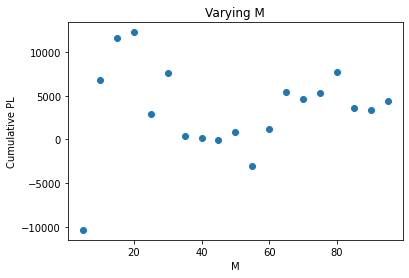

In [20]:
Ms = np.array([])
sims = np.array([])
M = 5
while M < 100:
    sim = simulation(M, 0.03,0.0075, 0.3)
    Ms = np.append(Ms, M)
    sims = np.append(sims, sim)
    M += 5
    
plt.scatter(Ms,sims)
plt.xlabel('M')
plt.ylabel('Cumulative PL')
plt.title('Varying M')
plt.show()

As long as M is not too small, performance does not show a drastic change across windows. Let's use 20 for our future simulations, as Cumulative PL was highest for that M.

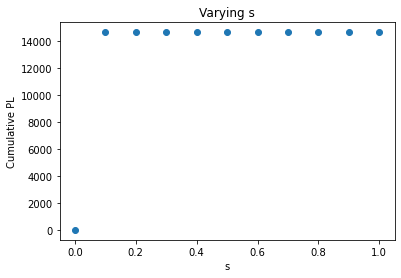

In [21]:
ss = []
sims = []
s = 0
while s < 1:
    sim = simulation(20, .02, 0.001, s)
    ss.append(s)
    sims.append(sim)
    s +=.1
    
plt.scatter(ss,sims)
plt.xlabel('s')
plt.ylabel('Cumulative PL')
plt.title('Varying s')
plt.show()

The stop loss parameter will only have an impact on Cumulative PL when stop losses are triggered (vs not triggered or triggered less often). Let's explore a tighter range:

In [22]:
max_ = -100000
ss = np.array([])
sims = np.array([])
s = 0
while s < .02:
    sim = simulation(20, .02, 0.001, s)
    ss = np.append(ss, s)
    sims = np.append(sims, sim)
    s +=.002
    
plt.plot(ss, sims)
plt.title('Varying s')
plt.xlabel('s')
plt.ylabel('Cumulative PL')
plt.show()

Profit is highest at s = 0.012. This is our new stop loss parameter. 

Fetching simulation combinations
Fetching simulation combinations
Fetching simulation combinations
Fetching simulation combinations
Fetching simulation combinations
Fetching simulation combinations
Fetching simulation combinations
Fetching simulation combinations
Fetching simulation combinations
Fetching simulation combinations


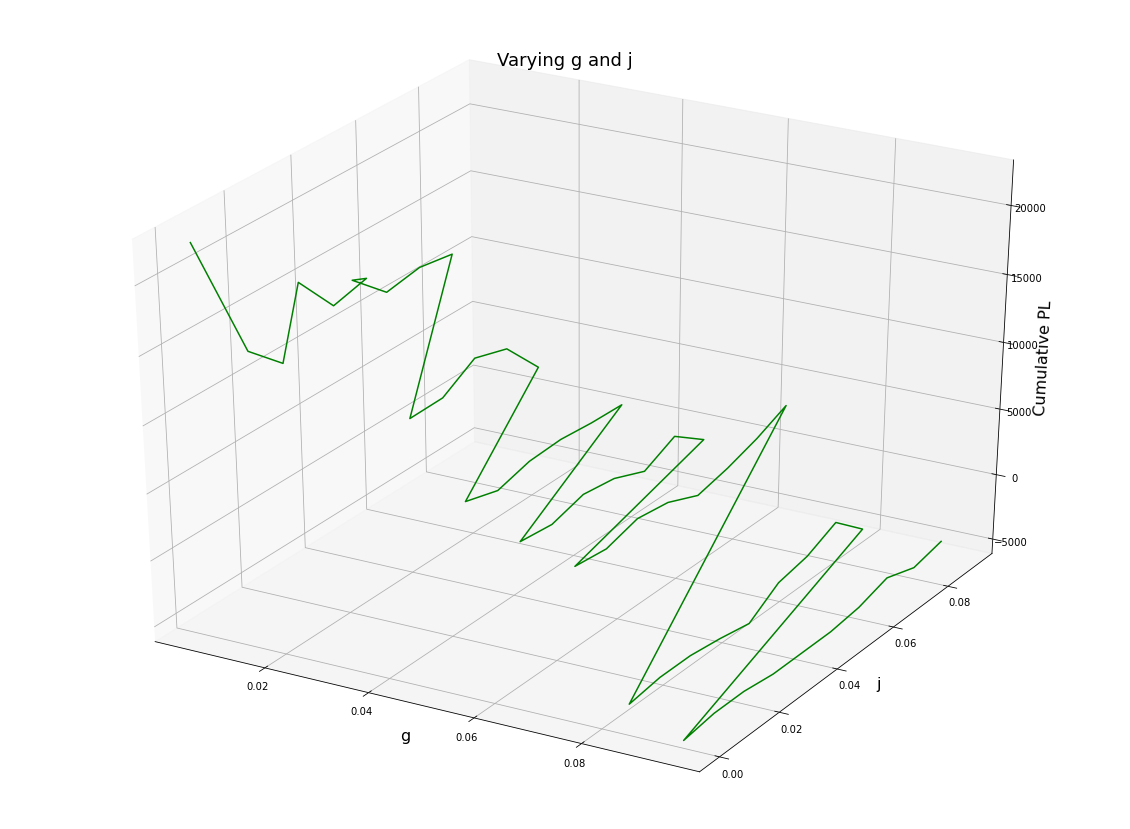

In [ ]:
M = 20
s = 0.012
gs = np.array([])
js = np.array([])
sims = np.array([])

g = 0.005
while g < 0.1:
    j = 0
    while j < g:
        gs = np.append(gs, g)
        js = np.append(js, j)
        sim = simulation(M, g, j, s)
        sims = np.append(sims, sim)
        j += 0.01
    print('Fetching simulation combinations')
    g += 0.01

fig = plt.figure(figsize=(20,15))
ax = plt.axes(projection ='3d')
ax.plot3D(gs, js, sims, 'green')
plt.title('Varying g and j', size = 18)
plt.xlabel('g', size = 16)
plt.ylabel('j', size = 16)
ax.set_zlabel('Cumulative PL', size = 16)
plt.show()

In [ ]:
max_sim = max(sims)  
opt_g = gs[list(sims).index(max_sim)]  
opt_j = js[list(sims).index(max_sim)]  
print('g = ' + str(round(opt_g * 100, 3)) + '%, j = ' + str(round(opt_j * 100, 3)) + '%, Cumulative PL = $' + str(round(max_sim, 3)))

g = 0.5%, j = 0.0%, Cumulative PL = $22660.382


*A successful combination is **M = 20, g = 0.005, j = 0, s = 0.012**. It is interesting to note that the 3-d graph seems to favor a smaller g and j than I anticipated. I would say this makes sense as if mean reversion is present then we should want to trade as much as possible whenever the spread widens a little, and because of the mean reversion we expect the spread to go back to zero (thus small j).*

## Analyzing (more) Optimal Parameter Performance

Build the daily returns dataframe (multiply by 100 to make into % like Fama French dataset):

In [ ]:
M = 20
g = 0.005
j = 0
s = 0.012
returns_df = simulation_df(M, g, j, s)[['Cumulative PL', 'Cash']]
returns_df['Total Value'] = returns_df['Cumulative PL'] + returns_df['Cash']
returns_df['Daily Return'] = None

for i in range(0, len(returns_df)):
        if i == 0:
            returns_df['Daily Return'].iloc[i] = np.log(returns_df['Total Value'].iloc[i] / K) * 100   
        else:
            returns_df['Daily Return'].iloc[i] = np.log(returns_df['Total Value'].iloc[i] / returns_df['Total Value'].iloc[i-1]) * 100

returns_df

,Cumulative PL,Cash,Total Value,Daily Return
Date,,,,
2019-01-02,0.000000,1.031923e+07,1.031923e+07,0.0
2019-01-03,0.000000,1.031919e+07,1.031919e+07,-0.000367
2019-01-04,667.136000,1.031919e+07,1.031986e+07,0.006465
2019-01-07,1343.182751,1.032057e+07,1.032191e+07,0.019931
2019-01-08,1343.182751,1.032063e+07,1.032197e+07,0.000565
2019-01-09,1468.457516,1.032063e+07,1.032210e+07,0.001214
2019-01-10,1428.568853,1.032063e+07,1.032206e+07,-0.000386
2019-01-11,1141.178508,1.032063e+07,1.032177e+07,-0.002784
2019-01-14,1132.990526,1.032063e+07,1.032176e+07,-0.000079


Some preliminary statistics:

In [ ]:
stats_ = pd.DataFrame(data = None, index = ['Daily Returns Stats'],columns = ['Mean', 'Std Dev', 'Skew', 'Kurtosis'])
stats_['Mean'] = str(round(returns_df['Daily Return'].mean(), 6)) + '%'
stats_['Std Dev'] = str(round(returns_df['Daily Return'].std(), 6)) + '%'
stats_['Skew'] = returns_df['Daily Return'].skew()
stats_['Kurtosis'] = returns_df['Daily Return'].kurtosis()

stats_

,Mean,Std Dev,Skew,Kurtosis
Daily Returns Stats,0.000868%,0.009599%,6.529177,91.065729


Analysis:
- Mean and standard deviation: The strategy seems quite volatile relative to its mean (low Sharpe ratio where we take out $r{_f}$ of the equation). These numbers are very small because we have an immense amount of capital, and a lot of it is not invested (and for periods of time we have no positions). 
<br>

- The daily returns are skewed right (positively skewed) which means a longer right tail. In other words, extreme positive returns are more likely. 
<br>

- Kurtosis is very large, meaning high peakness and many data points in the tails. This makes sense because a lot of the time daily returns are zero (no positions are open), and then when positions are open the returns seem extreme vs what we expect for the data. 

### Systematic Risk and Correlation to Fama French Factors:

In [ ]:
analysis_df = returns_df['Daily Return'].astype(float).to_frame(name = 'Strat Return')
analysis_df['Mkt-RF'] = ff_df['Mkt-RF']
analysis_df['SMB'] = ff_df['SMB']
analysis_df['HML'] = ff_df['HML']
analysis_df['RF'] = ff_df['RF']
analysis_df.corr()['Strat Return'].to_frame()

,Strat Return
Strat Return,1.000000
Mkt-RF,0.193033
SMB,-0.089923
HML,0.052421
RF,-0.016708


The returns of the RYE/XOP return spread trading strategy are not very correlated to the market risk premium or the other fama french factors, showing that this strategy may provide diversification to a portfolio. In simpler terms, when the market is down, our strategy may still be profitable. 

In [ ]:
y = analysis_df['Strat Return']
x = analysis_df[['Mkt-RF','RF','SMB','HML']]

reg_df = sm.OLS(y, x).fit().params.to_frame('Replication Regression')
reg_df.loc['R${^2}$'] = sm.OLS(y, x).fit().rsquared

reg_df

,Replication Regression
Mkt-RF,0.001190
RF,0.078404
SMB,-0.001594
HML,0.000234
R${^2}$,0.054826


In [ ]:
y = analysis_df['Strat Return']
x = sm.add_constant(analysis_df[['Mkt-RF','RF','SMB','HML']])

reg_df2 = sm.OLS(y, x).fit().params.to_frame('Replication Regression w intercept')
reg_df2.loc['R${^2}$'] = sm.OLS(y, x).fit().rsquared

reg_df2

,Replication Regression w intercept
const,0.001010
Mkt-RF,0.001158
RF,-0.043229
SMB,-0.001675
HML,0.000277
R${^2}$,0.051458


By running these two regressions we see that these factors cannot recreate the variability or the returns of RYE/XOP return spread trading strategy well at all. This once again shows us the difference in variability and returns of the strategy with respect to the market and other factors. 

### Other Metrics:
- Due to the magnitude of the returns because of the amount of capital, metrics such as the Sharpe ratio, Information ratio, and Sortino ratio would be nonsensical. The daily returns of risk free rate are significantly larger, so the Sharpe ratio would be negative, as would the other ratios assuming a benchmark with mean daily returns that are not tiny or negative. 
<br>

- The attractive aspects of this strategy are its low correlation to the market and the fact that positions are partially self financing in a sense (through the short position).  

**Maximum Drawdown:**

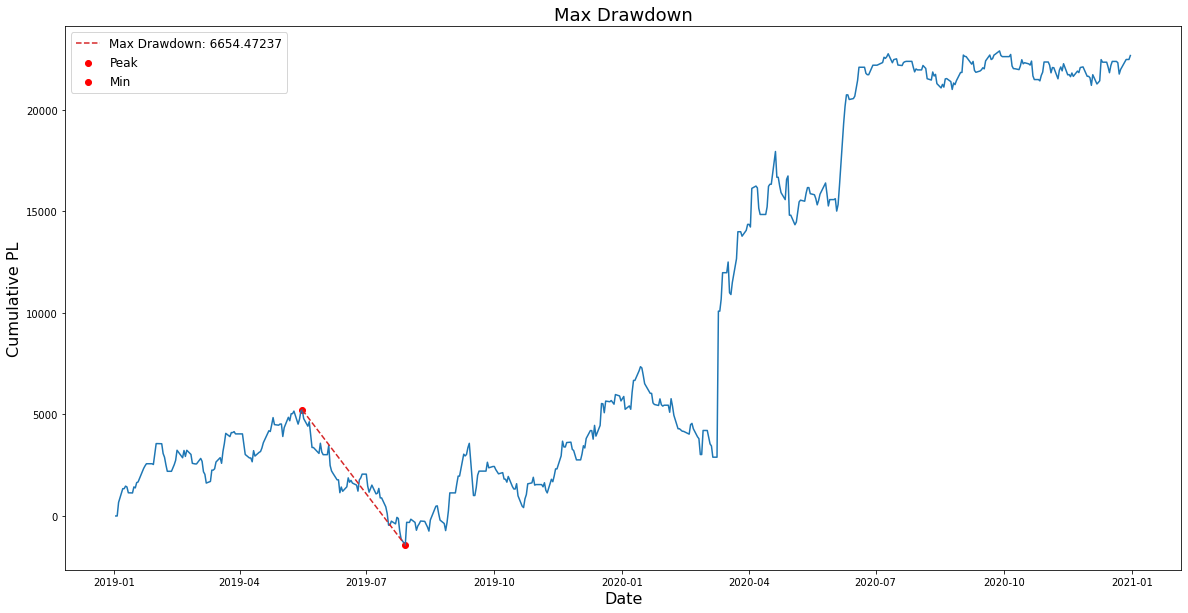

In [ ]:
drawdown_df = returns_df['Cumulative PL'].to_frame('Cumulative PL')
drawdown_df['Max'] = None
drawdown_df['Min'] = None
peak_ = -100
current_min = -100
drawdown = 0

for i in range(0, len(drawdown_df)):
    if drawdown_df['Cumulative PL'].iloc[i] > peak_:
        peak_ = drawdown_df['Cumulative PL'].iloc[i]
        peak_date = drawdown_df.iloc[i].name
        current_min = -100

    if drawdown_df['Cumulative PL'].iloc[i] < drawdown_df['Cumulative PL'].iloc[i-1] and drawdown_df['Cumulative PL'].iloc[i] < drawdown_df['Cumulative PL'].iloc[i+1]:
        current_min = drawdown_df['Cumulative PL'].iloc[i]
        min_date = drawdown_df.iloc[i].name
        diff = abs(peak_ - current_min)
        if diff > drawdown:
            drawdown = diff
            drawdown_peak = peak_
            drawdown_min = current_min
            drawdown_start = peak_date
            drawdown_end = min_date 

plt.figure(figsize=(20,10))

plt.plot(drawdown_df)

plt.scatter(drawdown_start,drawdown_peak, marker='o',color='red',label = 'Peak')
plt.scatter(drawdown_end,drawdown_min, marker='o',color='red',label = 'Min')

date_range = [drawdown_start, drawdown_end]
data_range = [drawdown_peak, drawdown_min]
plt.plot(date_range, data_range, '--', label = 'Max Drawdown: ' + str(round(drawdown,5)))

plt.title('Max Drawdown', size = 18)
plt.ylabel('Cumulative PL', size = 16)
plt.xlabel('Date', size = 16)
plt.legend(fontsize = 'large')
plt.plot()
plt.show()

In [ ]:
print('Max drawdown is ' + str(round((drawdown / K) * 100, 4)) + '% of capital')

Max drawdown is 0.0645% of capital


The maximum drawdown is small, especially when compared to the amount of capital we have, so this is a favorable metric for the strategy.

**Downside Beta:** <br>
Let's use this metric to determine how the strategy performs when the market is down.

In [ ]:
downmkt_df = analysis_df[analysis_df['Mkt-RF'] + analysis_df['RF'] < 0]
y = downmkt_df['Strat Return']
x = sm.add_constant(downmkt_df['Mkt-RF'])

downside_beta = sm.OLS(y, x).fit().params.to_frame('Downside Beta Regression')
downside_beta.loc['R${^2}$'] = sm.OLS(y, x).fit().rsquared

downside_beta

,Downside Beta Regression
const,-0.000073
Mkt-RF,0.000049
R${^2}$,0.000090


There appears to me no relationship between the strategy's performance and when the market is down, as our $R{^2}$ value is very small. The strategy seems to have little to no relationship to the market overall. 

**Stress Tests:**
We have seen that the market and this strategy have little correlation to each other (initial regression) and that a down market does not seem to have any impact on the returns of the strategy (through downside beta). However, let us still check for relevant large shocks and unexpected events. We will examine:
- The Oil crash in 2020 due to the COVID-19 pandemic: We are looking at an oil and gas exploration and production ETF and an equal weight energy ETF.
- Days that the oil market crashed throughout the period not specific to the early 2020 time period.

**Oil Market Stress Test:**
Let's start by zooming in on January 2020 to May 2020. We get the WTI Oil Futures contract level from Quandl and compare it to daily return % for our strategy.

In [ ]:
df_future = fetch_quandl(('OWF/NYM_CL_CL_Z2020_IVM','OWF/NYM_CL_CL_Z2020_IVM'))
oil_crash = (df_future['OWF/NYM_CL_CL_Z2020_IVM - Future_x'].loc['2020':'05-2020']).to_frame('Futures Level')
oil_crash['Strategy Return'] = returns_df['Daily Return']
oil_crash = oil_crash.dropna()

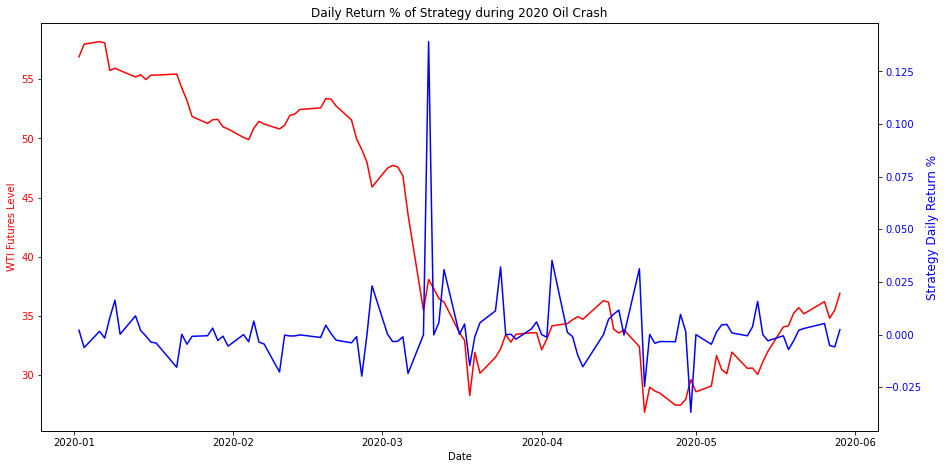

In [ ]:
fig, ax1 = plt.subplots(figsize=(15, 7.5))

ax1.set_xlabel('Date')
ax1.set_ylabel('WTI Futures Level', color='red')
ax1.plot(oil_crash.index, oil_crash['Futures Level'], color='red')
ax1.tick_params(axis='y', labelcolor='red')

ax2 = ax1.twinx()  
ax2.set_ylabel('Strategy Daily Return %', color='blue', size = 12) 
ax2.plot(oil_crash.index, oil_crash['Strategy Return'], color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

plt.title('Daily Return % of Strategy during 2020 Oil Crash') 
plt.show()

The crash actually results in the largest daily return we see. Perhaps this is because volatility has increased so much and the spread makes a large move in our favor. So while in the backtest this resulted in a big return for us, it's important to keep in mind that an oil crash could make the volatility of our strategy increase by a large magnitude. If we were to have been holding a different position and the spread moved in this way it may have triggered a stop loss, if this hypothesis is true. 
<br>

To explore further, let us use the downside beta approach, but instead of using the market as the factor, let's use an the oil futures to see how a down oil market affects our strategy:

In [ ]:
oil_ret_df = df_future['OWF/NYM_CL_CL_Z2020_IVM - Future_x'].to_frame('Futures Level')

oil_ret_df['Strategy Return'] = returns_df['Daily Return']
oil_ret_df['Futures Return'] = np.log(oil_ret_df['Futures Level']) - np.log(oil_ret_df['Futures Level'].shift(1))
downoil_df = oil_ret_df[oil_ret_df['Futures Return'] < 0].dropna()


y = np.asarray(downoil_df['Strategy Return'])
x = sm.add_constant(np.asarray(downoil_df['Futures Return']))

model = sm.OLS(y, x).fit()
downoil_beta = pd.DataFrame(model.params, index = ['const', 'Beta'],columns = ['Down Oil Mkt Regression'])
downoil_beta.loc['R${^2}$'] = sm.OLS(y.astype(float), x.astype(float)).fit().rsquared
downoil_beta

,Down Oil Mkt Regression
const,0.001174
Beta,0.043183
R${^2}$,0.017314


A down oil market does not seem to have a notable relationship with the return of our strategy. The $R{^2}$ is very low, so we believe a down oil market can help us explain very little about our strategy's returns. 
<br>

Let's also look at the data for the largest down swings. We'll take the data points that are 1.5 standard deviations away from the mean negative return of the oil futures.

In [ ]:
threshold = downoil_df['Futures Return'].mean() - downoil_df['Futures Return'].std() * 1.5
oil_crashes = downoil_df[downoil_df['Futures Return'] < threshold]


oilcrash_stats_ = pd.DataFrame(data = None, index = ['Oil Crash Stats'],columns = ['Mean', 'Std Dev'])
oilcrash_stats_['Mean'] = str(round(oil_crashes['Strategy Return'].mean().mean(), 6)) + '%'
oilcrash_stats_['Std Dev'] = str(round(oil_crashes['Strategy Return'].std(), 6)) + '%'

oilcrash_stats_

,Mean,Std Dev
Oil Crash Stats,-0.003887%,0.010662%


Comparing this to the entire strategy, standard deviation of returns does not increase much (from 0.009599% to 0.010662%)
However, we do see returns go negative from the prior 0.000868% mean for the whole period. Perhaps large crashes can result is worse returns for our strategy. However, given the small sample size and the prior regression analysis it is difficult to come up with a concrete answer here. It is simply something we should keep in mind while executing our strategy. 

## Extra: Fancy Nonlinear Optimizer:
I wanted to try and see if I could use an optimizer to find the ideal parameters. After quite a few issues with using multiple parameters and finding an optimizer that works with the dataframe structure I made I was able to find one. A couple notes about changes that had to be made for the optimizer to run for our purposes:
- The function takes a list of parameters as its input. This was necessary for the optimizer to run.
- I included M = math.floor(M) in the function because the optimizer inputs floats and my function just deals with full day lags because we use adjusted close prices.
- The function does not allow the optimizer to set s < 0, j >= g, g < 0, or j < 0
- The function returns a negative value because the optimizer minimizes. So we return the negative of Cumulative PL so we can actually find the maximum through minimization.
- **Note:** The big issue is still the time complexity of running our strategy. Notice how the niter parameter is not as large as we would like on the optimization function. This already took quite a while to run but I was able to show a lot of improvement from the initial guess. **I do not recommend rerunning as it will take some time.**

In [ ]:
def simulation_optimize(params):
    M, g, j, s = params 
    trading = adj_df.copy()
    
    if s < 0 or abs(j) >= abs(g) or g < 0 or j < 0:
        return 10000000
    
    trading['RYE Return'] = None
    trading['XOP Return'] = None
    M = math.floor(M)
    for i in range(M, len(trading)):
        trading['RYE Return'].iloc[i] = np.log(trading['EOD/RYE - Adj_Close'].iloc[i] / trading['EOD/RYE - Adj_Close'].iloc[i-M])
        trading['XOP Return'].iloc[i] = np.log(trading['EOD/XOP - Adj_Close'].iloc[i] / trading['EOD/XOP - Adj_Close'].iloc[i-M])
#     trading['RYE Return'] = trading['EOD/RYE - Adj_Close'].pct_change(periods = M)
#     trading['XOP Return'] = trading['EOD/XOP - Adj_Close'].pct_change(periods = M)
    trading['Return Spread'] = trading['RYE Return'] - trading['XOP Return']
    trading['Cumulative PL'] = 0
    trading['Current Position PL'] = 0
    trading['RYE position'] = 0
    trading['XOP position'] = 0
    trading['Cash'] = 0

    trading = trading.loc['2019':]
    
    for i in range(0, len(trading)):
        if i == 0:     ### FIRST DAY, INITIALIZE CASH AND MAYBE TRADE
            trading['Cash'].iloc[i] = K
            if abs(trading['Return Spread'].iloc[i]) >= g:
                trade_size = trading['$N_{t}$'].iloc[0]/100
                RYE_shares = round(trade_size / trading['EOD/RYE - Adj_Close'].iloc[i], 0)
                XOP_shares = round(trade_size / trading['EOD/XOP - Adj_Close'].iloc[i], 0)
                if trading['Return Spread'].iloc[i] > 0:
                    trading['RYE position'].iloc[i] = -RYE_shares
                    trading['XOP position'].iloc[i] = XOP_shares
                    trading['Cash'].iloc[i] -= trading['EOD/RYE - Adj_Close'].iloc[i] * -RYE_shares
                    trading['Cash'].iloc[i] -= trading['EOD/XOP - Adj_Close'].iloc[i] * XOP_shares
                    pos_spread = True
                else:
                    trading['RYE position'].iloc[i] = RYE_shares
                    trading['XOP position'].iloc[i] = -XOP_shares
                    trading['Cash'].iloc[i] -= trading['EOD/RYE - Adj_Close'].iloc[i] * RYE_shares
                    trading['Cash'].iloc[i] -= trading['EOD/XOP - Adj_Close'].iloc[i] * -XOP_shares
                    pos_spread = False
                gross_traded_cash = trading['EOD/RYE - Adj_Close'].iloc[i] * RYE_shares + trading['EOD/XOP - Adj_Close'].iloc[i] * XOP_shares

        elif i == len(trading) - 1:   ### EXIT POSITION AT LAST DATE
            trading['Cash'].iloc[i] = trading['Cash'].iloc[i-1]
            if trading['RYE position'].iloc[i-1] != 0 or trading['XOP position'].iloc[i-1] != 0:
                RYE_shares = trading['RYE position'].iloc[i-1]
                XOP_shares = trading['XOP position'].iloc[i-1]
                gain = ((RYE_shares * (trading['EOD/RYE - Adj_Close'].iloc[i] 
                                          - trading['EOD/RYE - Adj_Close'].iloc[i-1])) 
                        + (XOP_shares *(trading['EOD/XOP - Adj_Close'].iloc[i]
                                            - trading['EOD/XOP - Adj_Close'].iloc[i-1])))
                trading['Cash'].iloc[i] += trading['EOD/RYE - Adj_Close'].iloc[i] * RYE_shares
                trading['Cash'].iloc[i] += trading['EOD/XOP - Adj_Close'].iloc[i] * XOP_shares
                trading['Cumulative PL'].iloc[i] = trading['Cumulative PL'].iloc[i-1] + gain 
            else:
                trading['Cumulative PL'].iloc[i] = trading['Cumulative PL'].iloc[i-1]

        elif trading.iloc[i].name.month < trading.iloc[i+1].name.month and trading.iloc[i].name.day > 20:  ### IF LAST DAY OF THE MONTH EXIT POSITION
            trading['Cash'].iloc[i] = trading['Cash'].iloc[i-1]
            if trading['RYE position'].iloc[i-1] != 0 or trading['XOP position'].iloc[i-1] != 0:
                RYE_shares = trading['RYE position'].iloc[i-1]
                XOP_shares = trading['XOP position'].iloc[i-1]
                gain = ((RYE_shares * (trading['EOD/RYE - Adj_Close'].iloc[i] 
                                          - trading['EOD/RYE - Adj_Close'].iloc[i-1])) 
                        + (XOP_shares *(trading['EOD/XOP - Adj_Close'].iloc[i]
                                            - trading['EOD/XOP - Adj_Close'].iloc[i-1])))
                trading['Cash'].iloc[i] += trading['EOD/RYE - Adj_Close'].iloc[i] * RYE_shares
                trading['Cash'].iloc[i] += trading['EOD/XOP - Adj_Close'].iloc[i] * XOP_shares
                trading['Cumulative PL'].iloc[i] = trading['Cumulative PL'].iloc[i-1] + gain 
            else:
                trading['Cumulative PL'].iloc[i] = trading['Cumulative PL'].iloc[i-1]

        else:

            if trading['RYE position'].iloc[i-1] != 0 or trading['XOP position'].iloc[i-1] != 0:  ### DO WE ALREADY HAVE A POSITION
                trading['Cash'].iloc[i] = trading['Cash'].iloc[i-1]
                RYE_shares = trading['RYE position'].iloc[i-1]
                XOP_shares = trading['XOP position'].iloc[i-1]
                gain = ((RYE_shares * (trading['EOD/RYE - Adj_Close'].iloc[i] 
                                          - trading['EOD/RYE - Adj_Close'].iloc[i-1])) 
                        + (XOP_shares *(trading['EOD/XOP - Adj_Close'].iloc[i]
                                            - trading['EOD/XOP - Adj_Close'].iloc[i-1])))

                if pos_spread == True and trading['Return Spread'].iloc[i] <= j:    
                    trading['Cash'].iloc[i] += trading['EOD/RYE - Adj_Close'].iloc[i] * RYE_shares
                    trading['Cash'].iloc[i] += trading['EOD/XOP - Adj_Close'].iloc[i] * XOP_shares
                    trading['Cumulative PL'].iloc[i] = trading['Cumulative PL'].iloc[i-1] + gain 
                    if trading['Return Spread'].iloc[i] <= -g:
                        trade_size = trading['$N_{t}$'].iloc[0]/100
                        RYE_shares = round(trade_size / trading['EOD/RYE - Adj_Close'].iloc[i], 0)
                        XOP_shares = round(trade_size / trading['EOD/XOP - Adj_Close'].iloc[i], 0)
                        trading['RYE position'].iloc[i] = RYE_shares
                        trading['XOP position'].iloc[i] = -XOP_shares
                        trading['Cash'].iloc[i] -= trading['EOD/RYE - Adj_Close'].iloc[i] * RYE_shares
                        trading['Cash'].iloc[i] -= trading['EOD/XOP - Adj_Close'].iloc[i] * -XOP_shares
                        pos_spread = False
                        gross_traded_cash = (trading['EOD/RYE - Adj_Close'].iloc[i] * RYE_shares 
                                         + trading['EOD/XOP - Adj_Close'].iloc[i] * XOP_shares)

                elif pos_spread == False and trading['Return Spread'].iloc[i] >= -j:
                    trading['Cash'].iloc[i] += trading['EOD/RYE - Adj_Close'].iloc[i] * RYE_shares
                    trading['Cash'].iloc[i] += trading['EOD/XOP - Adj_Close'].iloc[i] * XOP_shares
                    trading['Cumulative PL'].iloc[i] = trading['Cumulative PL'].iloc[i-1] + gain 
                    if trading['Return Spread'].iloc[i] >= g:
                        trade_size = trading['$N_{t}$'].iloc[0]/100
                        RYE_shares = round(trade_size / trading['EOD/RYE - Adj_Close'].iloc[i], 0)
                        XOP_shares = round(trade_size / trading['EOD/XOP - Adj_Close'].iloc[i], 0)
                        trading['RYE position'].iloc[i] = -RYE_shares
                        trading['XOP position'].iloc[i] = XOP_shares
                        trading['Cash'].iloc[i] -= trading['EOD/RYE - Adj_Close'].iloc[i] * -RYE_shares
                        trading['Cash'].iloc[i] -= trading['EOD/XOP - Adj_Close'].iloc[i] * XOP_shares
                        pos_spread = True
                        gross_traded_cash = (trading['EOD/RYE - Adj_Close'].iloc[i] * RYE_shares 
                                         + trading['EOD/XOP - Adj_Close'].iloc[i] * XOP_shares)

                elif abs(trading['Current Position PL'].iloc[i-1] + gain) / gross_traded_cash > s:
                    trading['Cash'].iloc[i] += trading['EOD/RYE - Adj_Close'].iloc[i] * RYE_shares
                    trading['Cash'].iloc[i] += trading['EOD/XOP - Adj_Close'].iloc[i] * XOP_shares
                    trading['Cumulative PL'].iloc[i] = trading['Cumulative PL'].iloc[i-1] + gain 

                else:
                    trading['Current Position PL'].iloc[i] = trading['Current Position PL'].iloc[i-1] + gain
                    trading['Cumulative PL'].iloc[i] = trading['Cumulative PL'].iloc[i-1] + gain
                    trading['RYE position'].iloc[i] = RYE_shares
                    trading['XOP position'].iloc[i] = XOP_shares


            else:
                trading['Cash'].iloc[i] = trading['Cash'].iloc[i-1]
                trading['Cumulative PL'].iloc[i] = trading['Cumulative PL'].iloc[i-1] 
                if abs(trading['Return Spread'].iloc[i]) >= g:
                    trade_size = trading['$N_{t}$'].iloc[0]/100
                    RYE_shares = round(trade_size / trading['EOD/RYE - Adj_Close'].iloc[i], 0)
                    XOP_shares = round(trade_size / trading['EOD/XOP - Adj_Close'].iloc[i], 0)
                    if trading['Return Spread'].iloc[i] > 0:
                        trading['RYE position'].iloc[i] = -RYE_shares
                        trading['XOP position'].iloc[i] = XOP_shares
                        trading['Cash'].iloc[i] -= trading['EOD/RYE - Adj_Close'].iloc[i] * -RYE_shares
                        trading['Cash'].iloc[i] -= trading['EOD/XOP - Adj_Close'].iloc[i] * XOP_shares
                        pos_spread = True
                    else:
                        trading['RYE position'].iloc[i] = RYE_shares
                        trading['XOP position'].iloc[i] = -XOP_shares
                        trading['Cash'].iloc[i] -= trading['EOD/RYE - Adj_Close'].iloc[i] * RYE_shares
                        trading['Cash'].iloc[i] -= trading['EOD/XOP - Adj_Close'].iloc[i] * -XOP_shares
                        pos_spread = False
                    gross_traded_cash = (trading['EOD/RYE - Adj_Close'].iloc[i] * RYE_shares 
                                         + trading['EOD/XOP - Adj_Close'].iloc[i] * XOP_shares)


    return -trading['Cumulative PL'].iloc[-1]


from scipy.optimize import basinhopping

minimizer_kwargs = {"method": "BFGS"}
x0 = [5, 0.05, 0.0499999, 0]  ### terrible guess with negative profit to show optimizer working
ret = basinhopping(simulation_optimize, x0, minimizer_kwargs=minimizer_kwargs,
                   niter=50)
print('Optimal Parameters (M, g, j, s): ' + str(ret.x))

Optimal Parameters (M, g, j, s): [5.48096958 0.49469766 0.05951299 0.26721183]


In [ ]:
print('Cumulative PL for initial guess: ' + str(round(simulation(5, 0.05, 0.0499999, 0),2)))

Cumulative PL for initial guess: -3079.42


In [ ]:
print('Cumulative PL for these parameters: ' + str(round(-simulation_optimize(ret.x),2)))

Cumulative PL for these parameters: 0


Again, because of our small niter parameter on the optimizer we do not get the optimal parameters, but we can see the optimizer working towards a higher Cumulative PL.

## Resources
- Discussion board
- Lecture Notes
- Stack Overflow for debugging and dataframe operations
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.basinhopping.html#scipy.optimize.basinhopping
- https://matplotlib.org/2.2.5/gallery/api/two_scales.html